# 코드만 간단히

## 데이터 요약

In [ ]:
# 해당 데이터의 타입 체크

type() 

In [ ]:
# 데이터 몇개만 간단히 보기. ( )에 숫자를 넣으면 그 갯수만큼 뽑힘

df.head()  
df.tail()
df.sample()

In [ ]:
# 임의 변수를 고정(??)

df.sample(3, random_state=42)

In [ ]:
# 데이터 프레임 간단한 정보

df.info()

In [ ]:
# 데이터 프레임의 크기를 출력
# (행, 열)

df.shape

In [ ]:
# 해당 데이터프레임의 컬럼별 타입

df.dtypes

In [ ]:
# 데이터프레임의 요약정보를 가져옵니다.
# 수치형 데이터의 기술통계 값 : coount, mean, std, 4분위값, min, max

df.describe()

In [ ]:
# 범주형 데이터의 기술통계 값을 봅니다. 수치형은 'number'

df.describe(include="object")

In [ ]:
# 상관계수 보기 
# 1 : 완전히 같다
# 0 : 상관없음
# -1 : 정반대

df.corr()

### Series의 빈도 수

In [ ]:
# 특정 컬럼의 데이터 빈도 수

df["컬럼명"].value_counts()

In [ ]:
# 데이터의 비율을 보고 싶을 때

df["dataset"].value_counts(normalize=True)*100

### Group by
* 특정 컬럼의 데이터를 기준으로 묶어서 보고 싶을 때

In [ ]:
df.groupby("컬럼명")

In [ ]:
df_grp = df.groupby("컬럼명").describe()
df_grp

In [ ]:
df_grp['x']

In [ ]:
df_grp = df.groupby("컬럼명")[['x', 'y']].describe()
df_grp

In [ ]:
# T == transpose()  :  행과 열을 바꾸기
#df_grp['x'].transpose()

df_grp['x'].T

In [ ]:
corr = df.groupby("컬럼명").corr()
corr

In [ ]:
corr.loc["II"]

In [ ]:
# "컬럼명" 별로 그룹화 하여 y 값에 대한 평균 구하기
df.groupby("컬럼명")["y"].mean()

In [ ]:
# "컬럼명" 별로 그룹화하여 y값에 대한 표준편차만 볼때
df.groupby("컬럼명")["y"].std()

In [ ]:
# 평균과 표준편차 같이 보고싶을 때
df.groupby("컬럼명")["y"].agg(['mean','std'])

In [ ]:
df.groupby("dataset").agg({'x':'mean', 'y':["mean", "std"]})

# 보고싶은 열의 계산값을 딕셔너리로 묶어서 넣으면 볼 수 있다.
# 한 컬럼의 여러 계산값을 보고싶으면 리스트로 묶어서

## 데이터프레임 인덱싱

### 컬럼으로 가져오기

In [ ]:
# 컬럼명으로 데이터 가져오기

df['컬럼명1'] 
df[["컬럼명1", "컬럼명2"]]

In [ ]:
# 인덱스 번호로 데이터 가져오기
# loc == locate 

df.loc[0]
df.loc[4]

### 인덱스로 가져오기

In [ ]:
# 행을 가져올 때, 순서도 임의로 정할 수 있음

df.loc[[0, 1, 2]]

In [ ]:
# 행, 열 정해서 가져올 수 있음
# loc[행, 열]
# 행 : index  /  열 : columns

df.loc[0, "컬럼명1"]
df.loc[[0,1], "컬럼명1"]
df.loc[[0, 1], ["컬럼명1", "컬럼명2"]]

### 컬럼 추가 / 삭제

In [ ]:
# 새로운 컬럼 추가
# 데이터프레임보다 데이터의 길이가 길면 안됨

df["새_컬럼명"] = ["데이터1", "데이터2","데이터3"...]

In [ ]:
# 데이터프레임에서 컬럼, 로우(행) 삭제   axis =1 : 컬럼 / 0 : 로우(행) 
# df에 컬럼을 빼고 덮어 씀

df = df.drop(['컬럼명1',"컬럼명2"], axis=1)

### 특정 데이터 값 찾는 법

In [ ]:
# 컬럼에서 특정 글자가 포함된 데이터 가져오기
# boolean indexing

df["컬럼명"].str.contains("글자")
df[df["컬럼명"].str.contains("글자")]

In [ ]:
# 파이썬은 대소문자를 구분함
# 데이터를 소문자로 바꾸거나, 대문자로 바꿔서 인덱싱을 해야함
# 소문자로 바꾸면 새로운 컬럼을 만들어 추가함(row데이터에 덮어쓰지 말 것.)

df["컬럼명"].str.lower()
df["컬럼명"].str.upper()
df["컬럼명_소문자"] = df["컬럼명"].str.lower()

In [ ]:
# 판다스 정규표현식에서  and => &
#                        or => |     (shift + \)

# 예시) df["약품명_소문자"].str.contains("vita|비타")

In [ ]:
# 조건을 넣어 찾을 수 있다

df[df["컬럼명"] > 3500]

### 정렬하기
    * .sort_values()
    * .sort_index()

In [ ]:
# 특정 컬럼을 기준으로 정렬  ascending = True : 오름차순 / False : 내림차순

df.sort_values("컬럼명", ascending=False)
df.sort_values(["컬럼명1", "컬럼명2"], ascending=[True, False])

## 시각화 (Seaborn)

### 1. counterplot
    * 빈도 수 체크
    * 변수를 x 에 주면 세로로, y 에 주면 가로로 뻗는다.

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
df = sns.load_dataset("anscombe")
df.sample(4)

,dataset,x,y
39,IV,8.0,5.25
16,II,14.0,8.10
0,I,10.0,8.04
11,II,10.0,9.14


<AxesSubplot:xlabel='dataset', ylabel='count'>

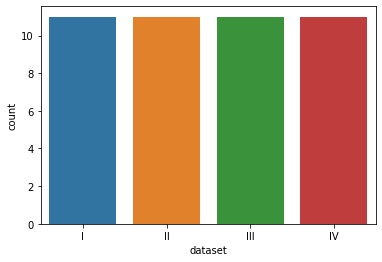

In [22]:
# x 나 y 하나만 지정해주면 된다. 

sns.countplot(data=df, x="dataset")

<AxesSubplot:xlabel='count', ylabel='dataset'>

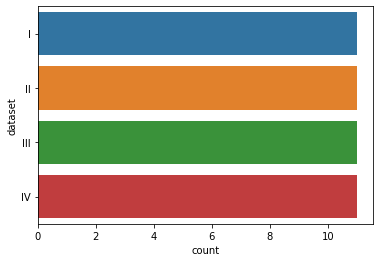

In [23]:
sns.countplot(data=df, y="dataset")

### 2. barplot
* 기본 세팅 : 평균 값 + 신뢰 구간(ci)

<AxesSubplot:xlabel='dataset', ylabel='x'>

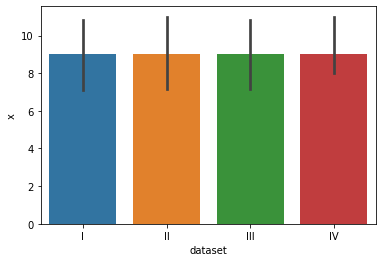

In [24]:
sns.barplot(data=df, x="dataset", y="x")

<AxesSubplot:xlabel='dataset', ylabel='y'>

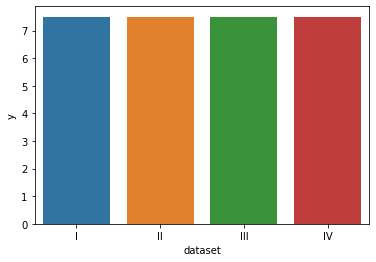

In [25]:
# 기본 값 : 평균만 ( 큰 기둥 )
sns.barplot(data=df, x="dataset", y="y", ci=None, estimator=np.mean )

### 3. boxplot

<AxesSubplot:xlabel='dataset', ylabel='x'>

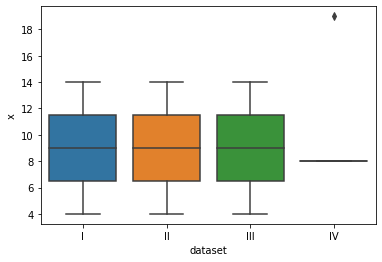

In [26]:
sns.boxplot(data=df, x="dataset", y="x")

<AxesSubplot:xlabel='dataset', ylabel='y'>

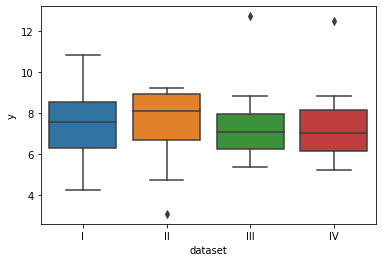

In [27]:
sns.boxplot(data=df, x="dataset", y="y")

### 4. violinplot
* boxplot 보다 데이터의 형태를 알기 용이하다

<AxesSubplot:xlabel='dataset', ylabel='x'>

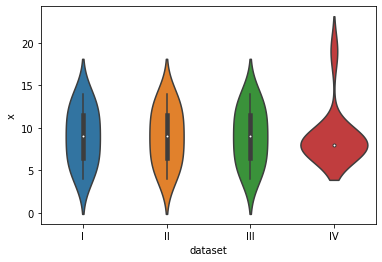

In [28]:
sns.violinplot(data=df, x="dataset", y="x")

### 5. scatterplot

<AxesSubplot:xlabel='x', ylabel='y'>

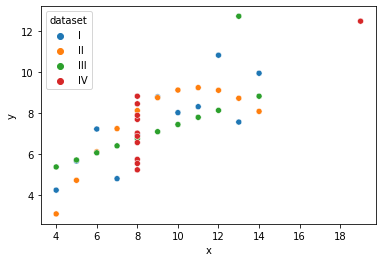

In [29]:
# hue :색깔 기준
sns.scatterplot(data=df, x="x", y="y", hue="dataset")

### 6. regplot

<AxesSubplot:xlabel='x', ylabel='y'>

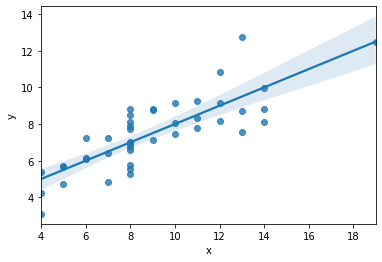

In [30]:
sns.regplot(data=df, x="x", y="y")

### 7. lmplot

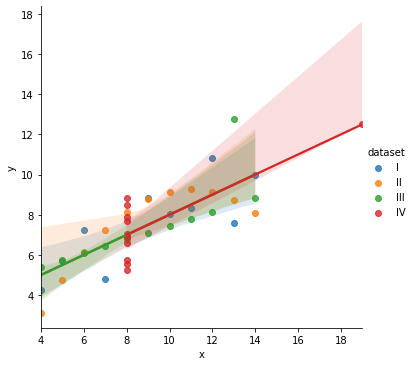

In [31]:
sns.lmplot(data=df, x="x", y="y", hue="dataset")

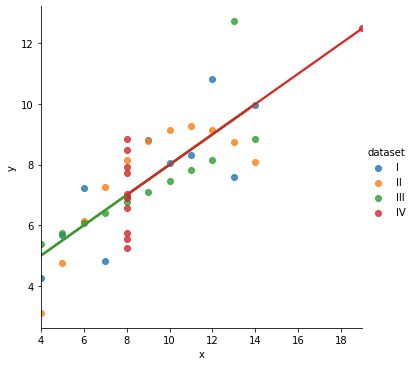

In [32]:
# 신뢰구간(ci)가 있으면 돌아가는 시간이 비약적으로 늘어니니까 될 수 있으면 빼고 하는게 좋다.

sns.lmplot(data=df, x="x", y="y", hue="dataset", ci=None)

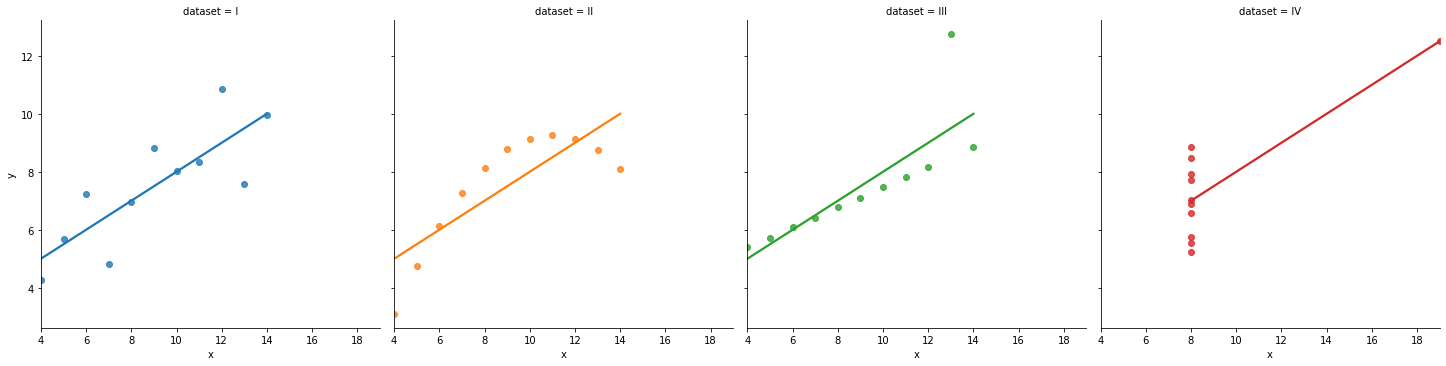

In [33]:
# 플롯 나눠보기

sns.lmplot(data=df, x="x", y="y", hue="dataset",
           ci=None, col="dataset")

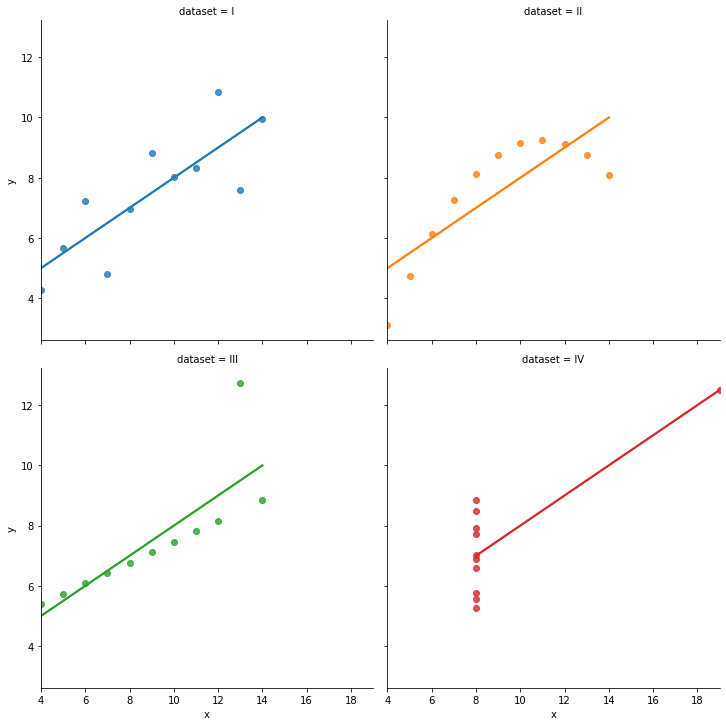

In [34]:
# 보기 쉽게 정리

sns.lmplot(data=df, x="x", y="y", hue="dataset",
           ci=None, col="dataset", col_wrap=2)

## 파일로 저장하기 / 불러오기

In [ ]:
# to_csv 를 통해 csv 파일로 저장
# index = False  : 판다스에서 쓰는 인덱스를 저장하지 않음

df.to_csv("파일명.csv", index = False)

In [ ]:
# 특정 경로로 저장하는 법

df.to_csv("경로명1/경로명2/파일명.csv", index = False)

In [ ]:
# 저장된 csv 파일을 읽어오기

pd.read_csv("경로명1/경로명2/파일명.csv")